In [1]:
%matplotlib inline

import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import requests
import io
url = 'https://api.blockchain.info/charts/market-price?format=csv&timespan=all'
data = io.StringIO('Date,Price\n'+ requests.get(url).text)

In [3]:
data.seek(0)
df = pandas.read_csv(data, parse_dates=['Date'])

In [4]:
df.index = df['Date']
del(df['Date'])

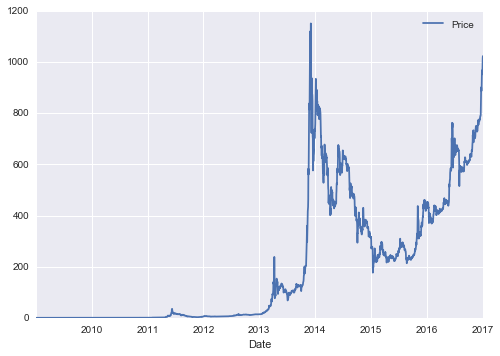

In [5]:
df.plot()

In [6]:
df['BTC/USD'] = df.apply(lambda inv: 1/inv)

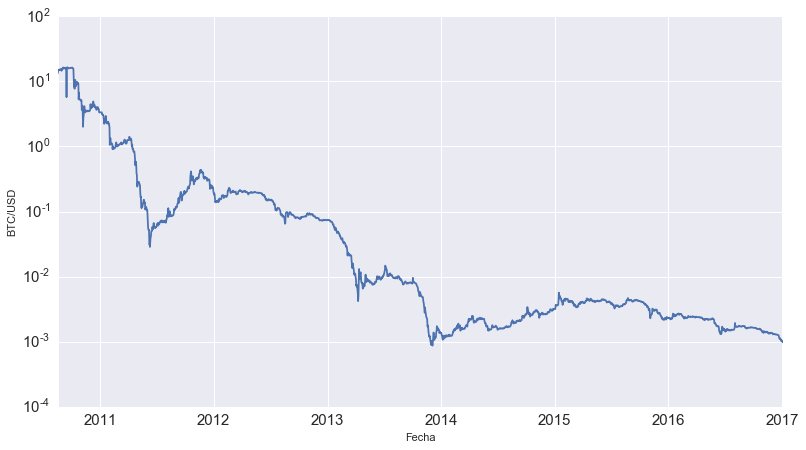

In [7]:
res = df['BTC/USD'].replace([np.inf, -np.inf], np.nan).dropna()
fig = res.plot(logy=True, figsize=(13,7), fontsize=15)
fig.set_ylabel('BTC/USD')
fig.set_xlabel('Fecha')
plt.savefig('/tmp/btc-usd.png')